In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [2]:
import os
os.chdir('../')
from function import make_data

In [3]:
df_2 = pd.read_csv('./pn500.csv')

In [4]:
dx = np.diff(df_2['V2'], axis=0)

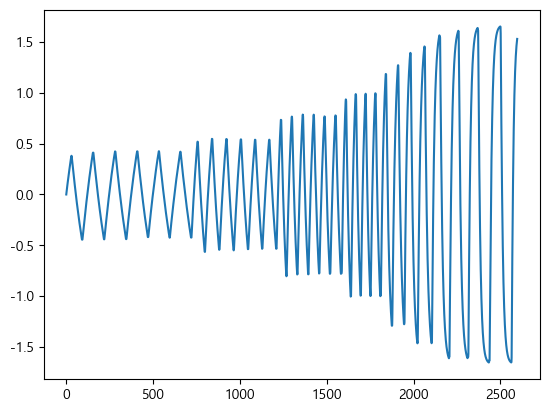

In [5]:
plt.plot(df_2['V2'])

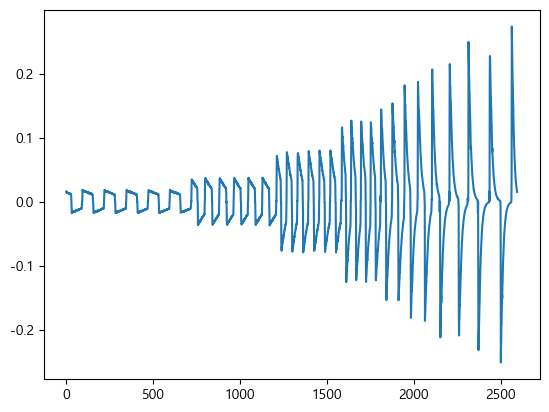

In [6]:
plt.plot(dx)

In [7]:
def eval_inc(z, dx, gamma, beta, alpha, n):
    psi = gamma + beta * np.sign(dx * z)
    dz = dx * (1-abs(z)**n * psi)
    df = (1-alpha) * dx + alpha * dz
    de = z * dx

    return dz, df, de

In [8]:
result_matrix = np.zeros((len(df_2), 4)) # z, x, f, e

In [9]:
for i in range(len(result_matrix)-1):
    res = eval_inc(result_matrix[i,1], dx[i], 0.1, 0.5, 0.001, 1)

    result_matrix[i+1,0] = result_matrix[i,0] + dx[i] # x
    result_matrix[i+1,1] = result_matrix[i,1] + res[0] # z
    result_matrix[i+1,2] = result_matrix[i,2] + res[1] # f
    result_matrix[i+1,3] = result_matrix[i,3] + res[2] # e


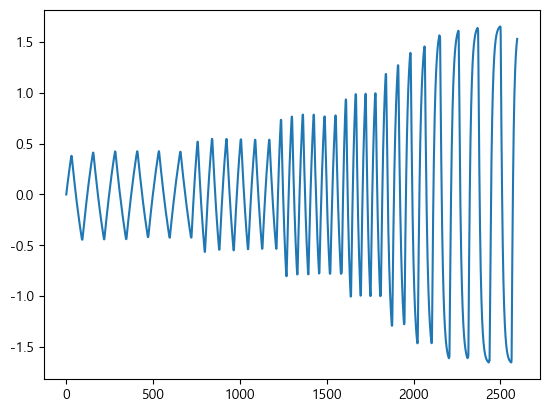

In [10]:
plt.plot(result_matrix[:,2])

-----

In [11]:
df = make_data(dt = 1, total_time = 10000)

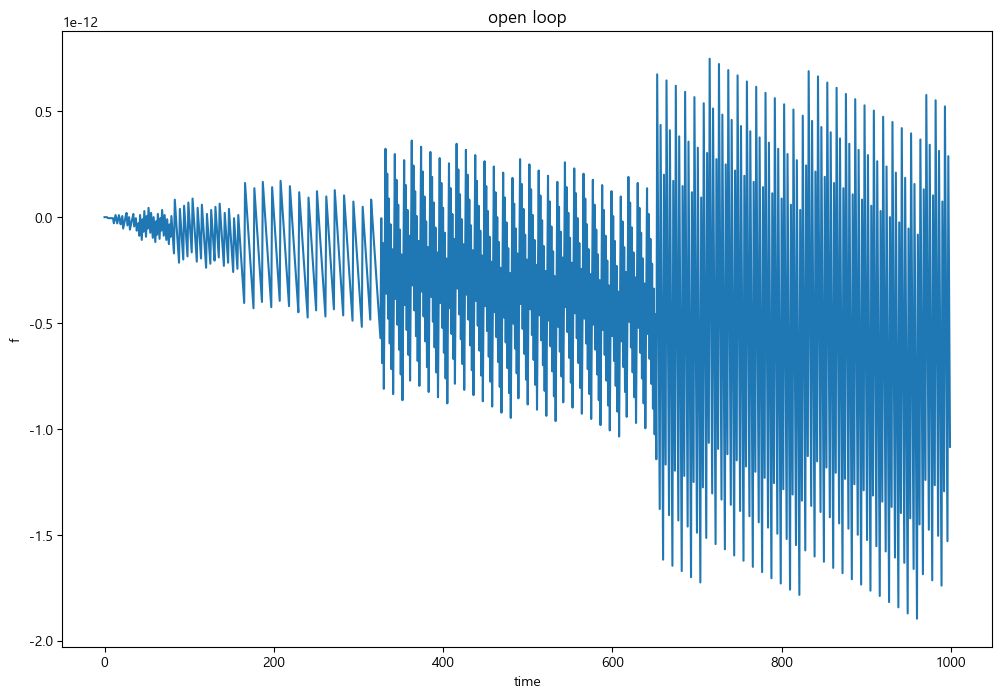

In [12]:
plt.figure(figsize=(12,8))
plt.title('open loop')
plt.plot(df.f[:1000])
plt.ylabel('f')
plt.xlabel('time')
plt.show()

In [13]:
train_df = df[:6000]
test_df = df[6000:]

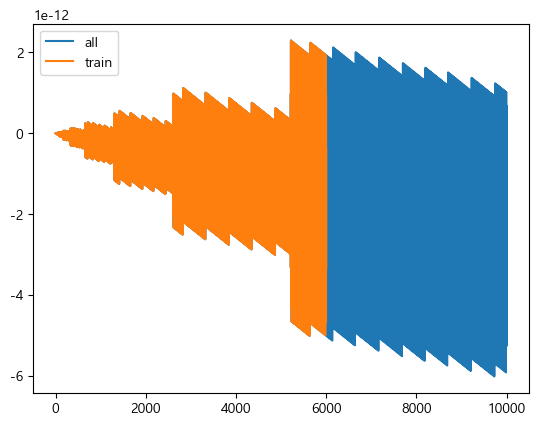

In [14]:
plt.plot(df.u)
plt.plot(train_df.u)
plt.legend(['all', 'train'])

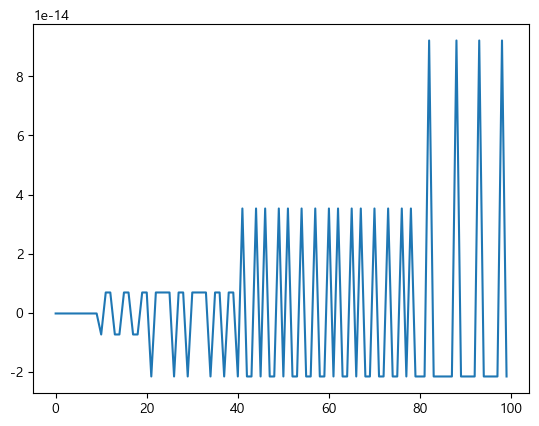

In [15]:
plt.plot(np.diff(df.u, axis=0)[:100])

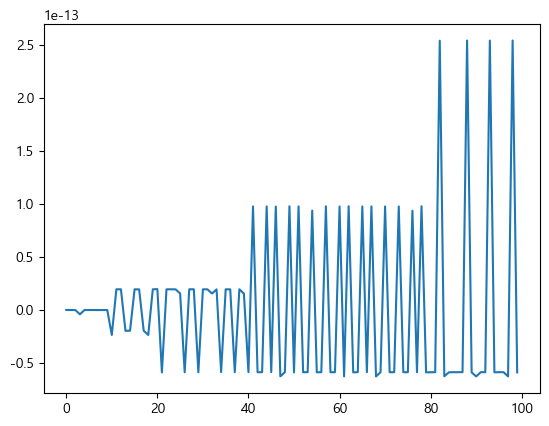

In [16]:
plt.plot(np.diff(df.f, axis=0)[:100])

In [17]:
d_x = np.diff(df.u, axis=0)

In [18]:
train_dx = d_x[:6000]
test_dx = d_x[6000:]

In [19]:
from pyswarm import pso

In [20]:
def objective_function(params, z, dx, n, target_df):
    gamma, beta, alpha = params
    df_list = []
    for i in range(len(target_df)):
        _, df, _ = eval_inc(z, dx, gamma, beta, alpha, n)
        df_list.append(df)
    total_error = np.sum(np.abs(np.array(df_list) - np.array(target_df)))
    return total_error

In [21]:
lb = [-10, -10, -10] 
ub = [10, 10, 10]

args = (0, train_dx, 1, np.append(np.diff(train_df['f'], axis=0),0))

In [22]:
optimized_params, _ = pso(objective_function, lb, ub, maxiter=5000, args = args, debug = True)

No constraints given.
New best for swarm at iteration 1: [-5.21988105  8.23864109 -7.66885602] 7.344743558322794e-05
Stopping search: Swarm best objective change less than 1e-08


In [23]:
optimized_params

array([-5.21988105,  8.23864109, -7.66885602])

In [24]:
gamma, beta, alpha = optimized_params

In [25]:
result_matrix_2 = np.zeros((len(df), 4)) # z, x, f, e

In [26]:
for i in range(len(result_matrix_2)-1):
    res = eval_inc(result_matrix_2[i,1], d_x[i], gamma, beta, alpha, 1)

    result_matrix_2[i+1,0] = result_matrix_2[i,0] + d_x[i] # x
    result_matrix_2[i+1,1] = result_matrix_2[i,1] + res[0] # z
    result_matrix_2[i+1,2] = result_matrix_2[i,2] + res[1] # f
    result_matrix_2[i+1,3] = result_matrix_2[i,3] + res[2] # e


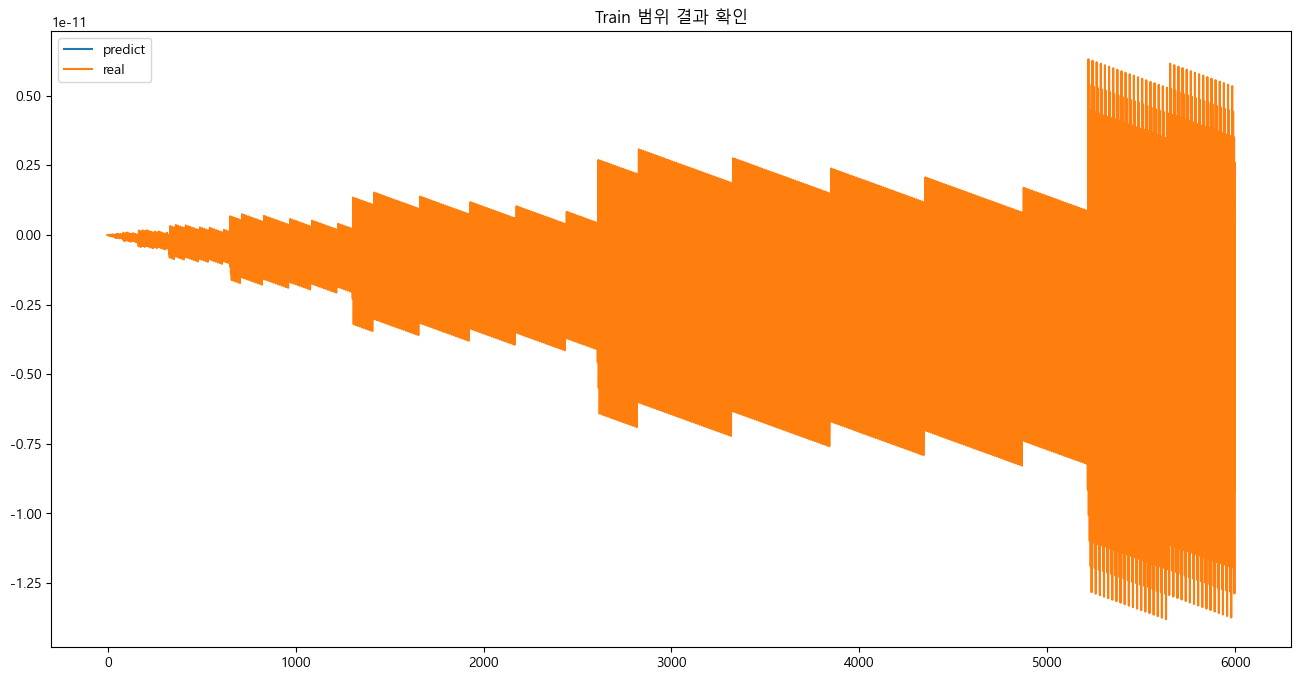

In [27]:
plt.figure(figsize=(16,8))
plt.plot(range(len(train_df)),result_matrix_2[:,2][:len(train_df)])
plt.plot(range(len(train_df)), train_df.f)
plt.title('Train 범위 결과 확인')
plt.legend(['predict', 'real'])
plt.show()

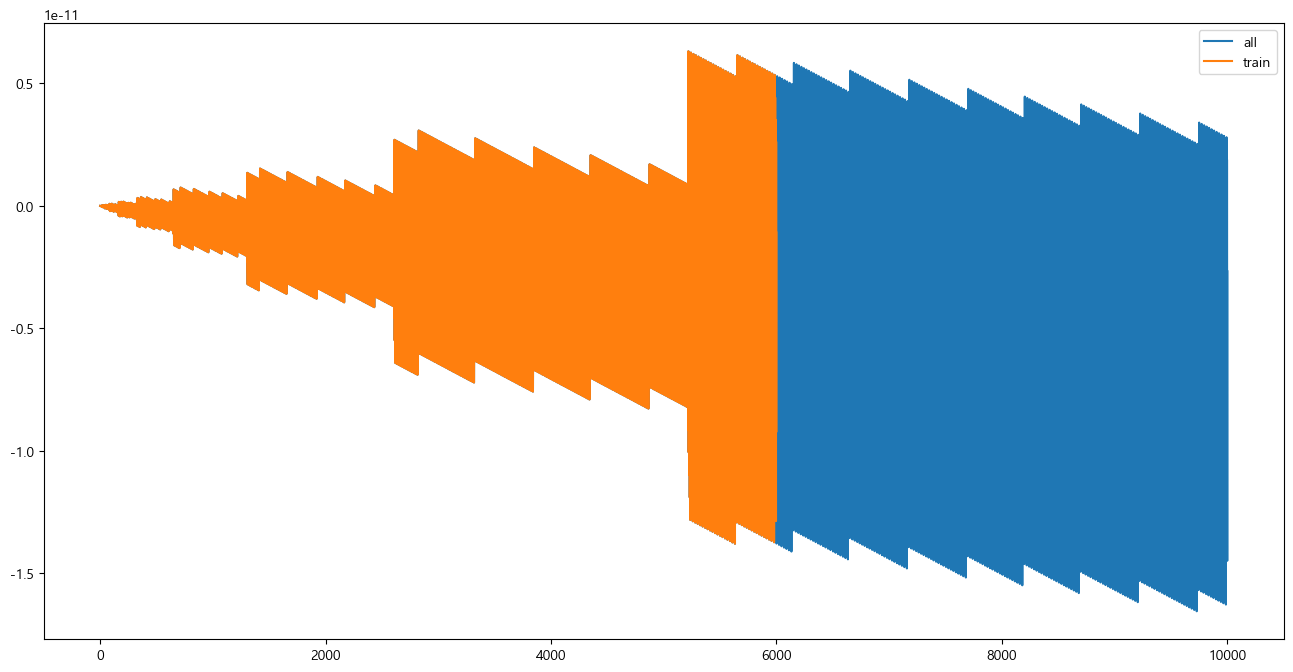

In [28]:
plt.figure(figsize=(16,8))
plt.plot(df.f)
plt.plot(train_df.f)
plt.legend(['all', 'train'])

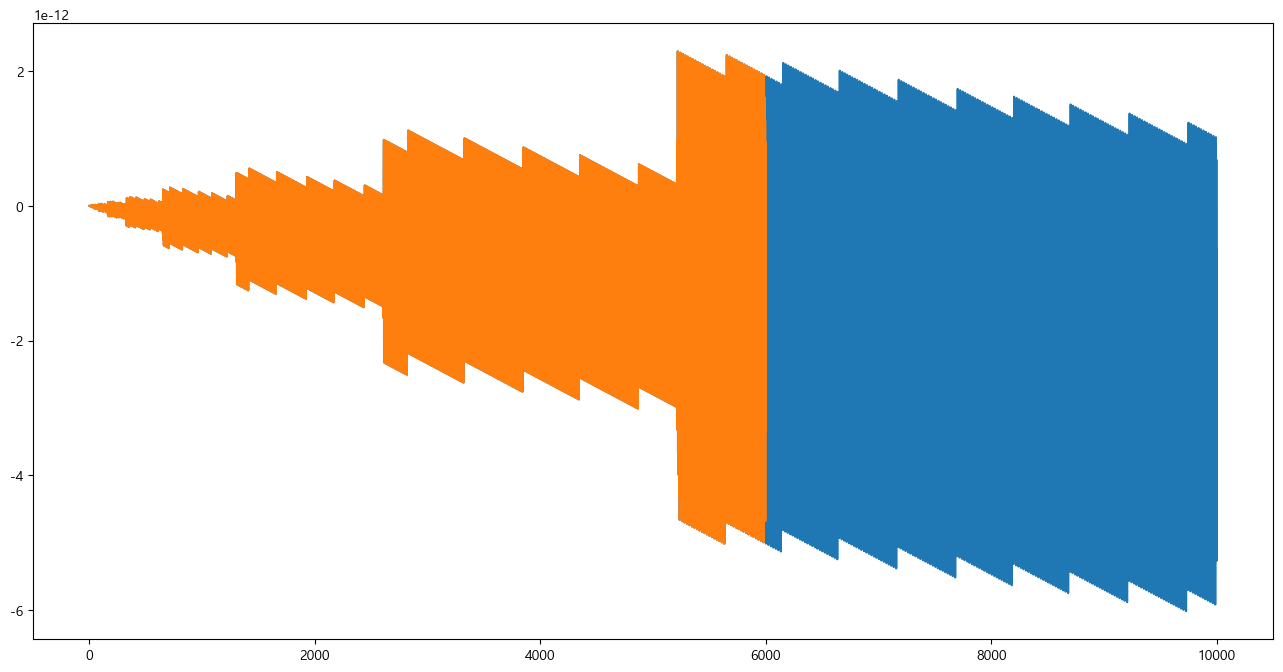

In [29]:
plt.figure(figsize=(16,8))
plt.plot(range(0, 10001, 1),result_matrix_2[:,2])
plt.plot(range(0, 6000, 1), train_df.u)
#plt.plot(range(8000, 10000, 1), test_df.u[:2000])

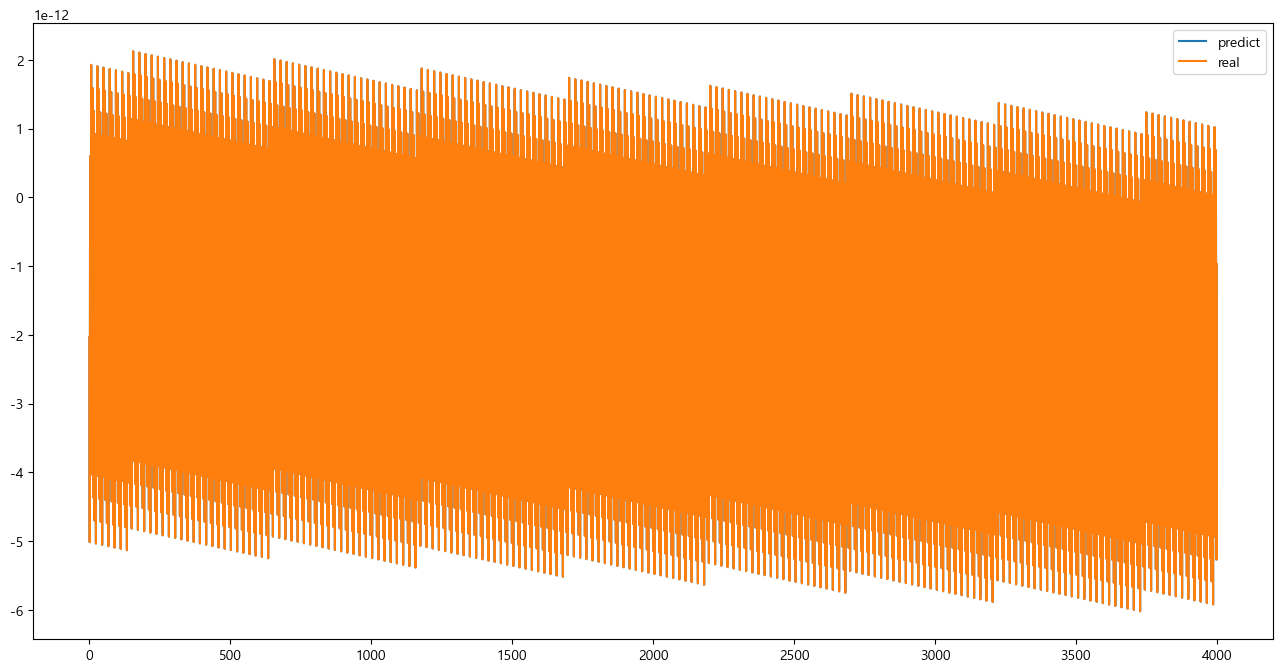

In [30]:
plt.figure(figsize = (16, 8))
plt.plot(range(4001),result_matrix_2[:,2][len(train_df):])
plt.plot(range(4001), df.u[len(train_df):])
plt.legend(['predict', 'real'])
plt.show()

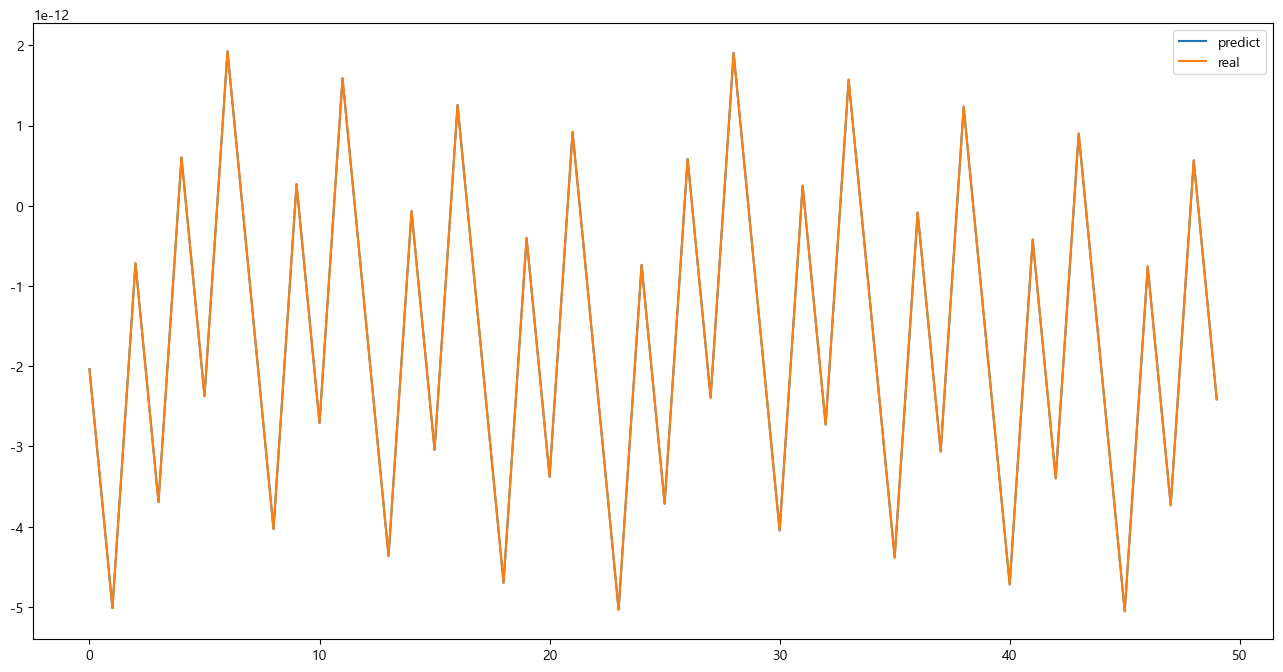

In [31]:
plt.figure(figsize = (16, 8))
plt.plot(range(50),result_matrix_2[:,2][len(train_df):len(train_df)+50])
plt.plot(range(50), df.u[len(train_df):len(train_df)+50])
plt.legend(['predict', 'real'])
plt.show()

In [32]:
close_df = make_data(dt = 0.01, total_time = 100)

In [33]:
close_df

,u,time,f
0,0.000000e+00,0.00,0.000000
1,6.279052e-02,0.01,0.152729
2,1.253332e-01,0.02,0.272857
3,1.873813e-01,0.03,0.369560
4,2.486899e-01,0.04,0.449713
...,...,...,...
9996,-2.486899e-01,99.96,0.299485
9997,-1.873813e-01,99.97,0.338637
9998,-1.253332e-01,99.98,0.375329
9999,-6.279052e-02,99.99,0.410222


In [34]:
close_df_train = close_df[:6000]
close_df_test = close_df[6000:]

In [35]:
close_dx = np.diff(close_df.u, axis=0)

In [36]:
train_close_dx = close_dx[:6000]
test_close_dx = close_dx[6000:]

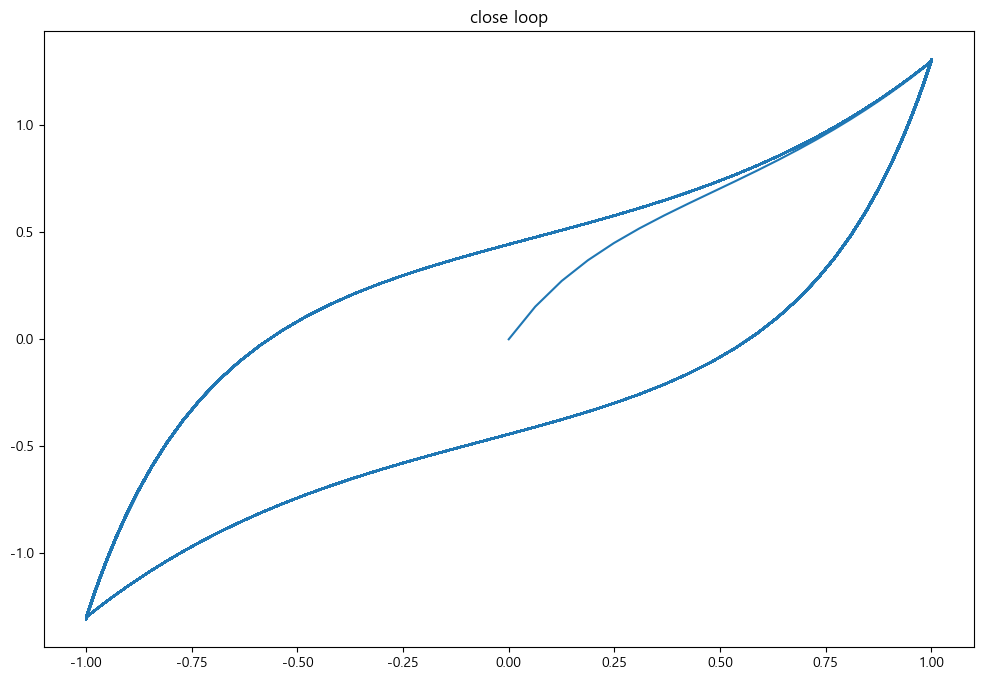

In [37]:
plt.figure(figsize=(12,8))
plt.title('close loop')
plt.plot(close_df.u, close_df.f)
plt.show()

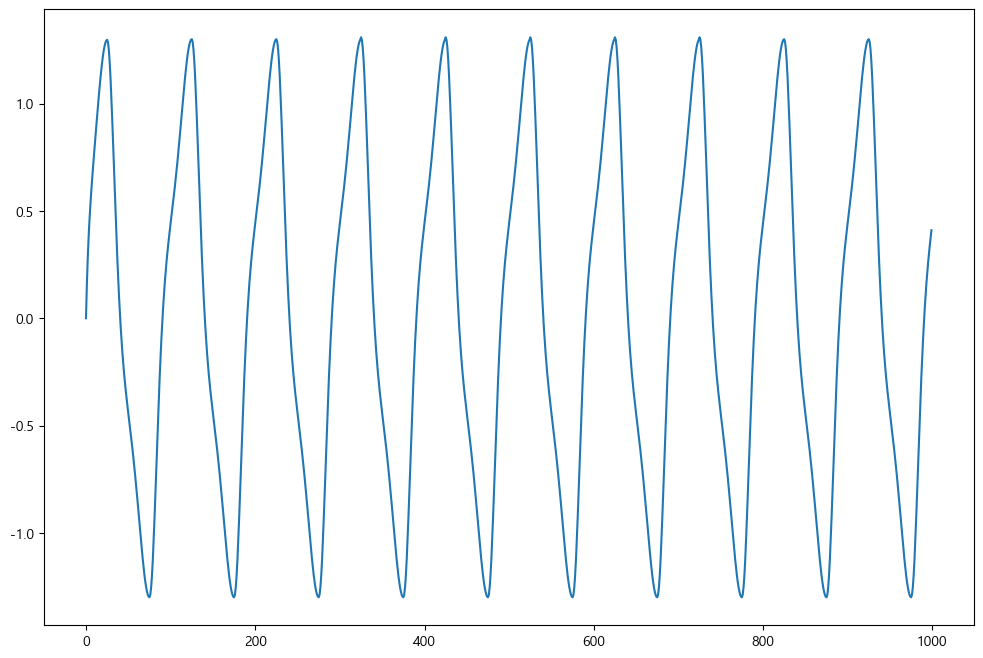

In [38]:
plt.figure(figsize=(12,8))
plt.plot(close_df.f[:1000])

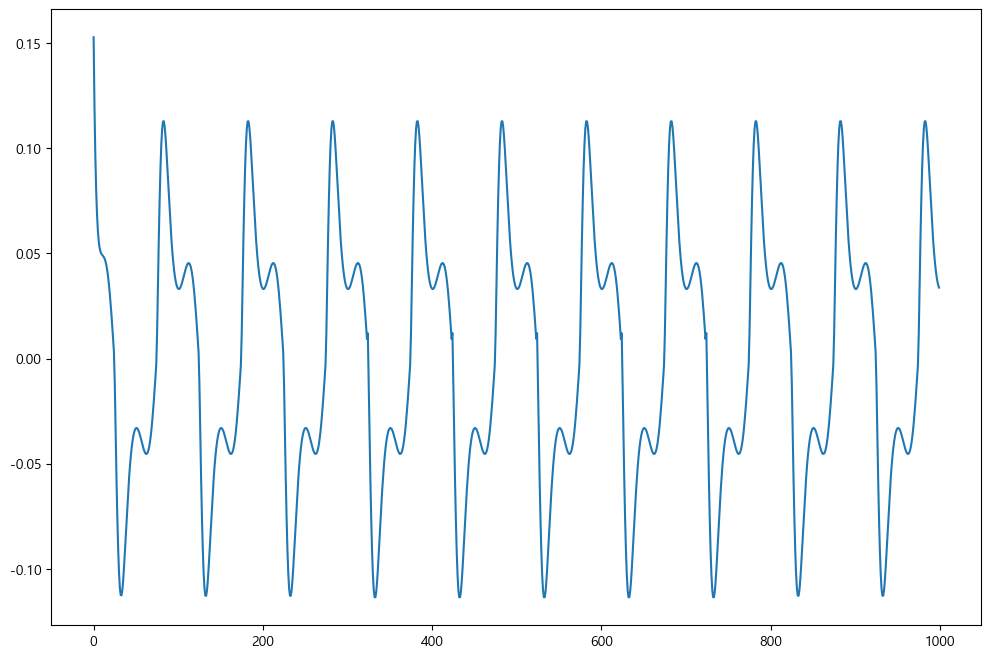

In [39]:
plt.figure(figsize=(12,8))
plt.plot(np.diff(close_df['f'], axis=0)[:1000])

In [40]:
traget_df = np.append(np.diff(close_df_train['f'], axis=0),0)

In [41]:
args_2 = (train_close_dx, traget_df)

In [42]:
pso

<function pyswarm.pso.pso(func, lb, ub, ieqcons=[], f_ieqcons=None, args=(), kwargs={}, swarmsize=100, omega=0.5, phip=0.5, phig=0.5, maxiter=100, minstep=1e-08, minfunc=1e-08, debug=False)>

In [47]:
def objective_function_2(params, dx, target_df):
    gamma, beta, alpha, z, n = params
    df_list = []
    for i in range(len(target_df)):
        _, df, _ = eval_inc(z, dx, gamma, beta, alpha, n)
        df_list.append(df)
    total_error = np.sum(np.abs(np.array(df_list) - np.array(target_df)))
    return total_error

In [49]:
lb_2 = [-10, -10, -10, -10, -10]
ub_2 = [10, 10, 10, 10, 10]

In [70]:
optimized_params_2, _ = pso(objective_function_2, lb_2, ub_2, maxiter=1000, args = args_2, debug=True, swarmsize=12, phip = 0.7, phig = 0.7, minstep=1e-10)

No constraints given.
Best after iteration 1: [ 4.94354199 -6.18052417  1.68242947 -6.78397195 -4.2463857 ] 966633.737757488
Best after iteration 2: [ 4.94354199 -6.18052417  1.68242947 -6.78397195 -4.2463857 ] 966633.737757488
New best for swarm at iteration 3: [10.         -6.15401322  0.49168241 -4.96818991 -2.29394149] 961603.5528437812
Best after iteration 3: [10.         -6.15401322  0.49168241 -4.96818991 -2.29394149] 961603.5528437812
Best after iteration 4: [10.         -6.15401322  0.49168241 -4.96818991 -2.29394149] 961603.5528437812
New best for swarm at iteration 5: [10.         -5.35051587  0.79574455 -7.25498012 -2.62194314] 961158.7974021257
Best after iteration 5: [10.         -5.35051587  0.79574455 -7.25498012 -2.62194314] 961158.7974021257
Best after iteration 6: [10.         -5.35051587  0.79574455 -7.25498012 -2.62194314] 961158.7974021257
New best for swarm at iteration 7: [10.         -4.74759863  0.66240672 -6.61892837 -2.60620103] 960657.7737519419
Best after 

In [71]:
optimized_params_2

array([ 7.81475847,  0.06565674,  1.00188078, -5.00153234, -2.60897066])

In [72]:
gamma_close, beta_close, alpha_close, close_z, close_n = optimized_params_2

In [73]:
result_matrix_3 = np.zeros((len(close_df), 4)) # z, x, f, e

In [74]:
for i in range(len(result_matrix_3)-1):
    res = eval_inc(close_z, d_x[i], gamma_close, beta_close, alpha_close, close_n)

    result_matrix_3[i+1,0] = result_matrix_3[i,0] + close_dx[i] # x
    result_matrix_3[i+1,1] = result_matrix_3[i,1] + res[0] # z
    result_matrix_3[i+1,2] = result_matrix_3[i,2] + res[1] # f
    result_matrix_3[i+1,3] = result_matrix_3[i,3] + res[2] # e


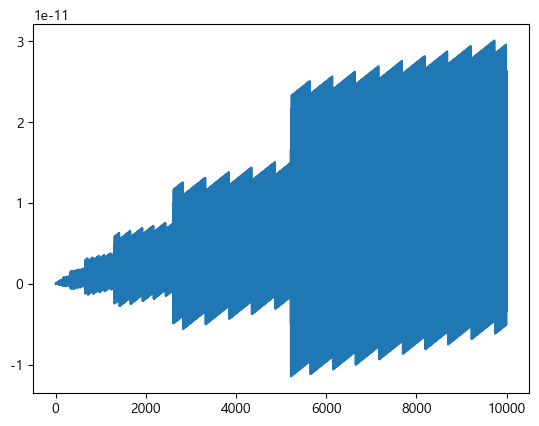

In [75]:
plt.plot(result_matrix_3[:,3])

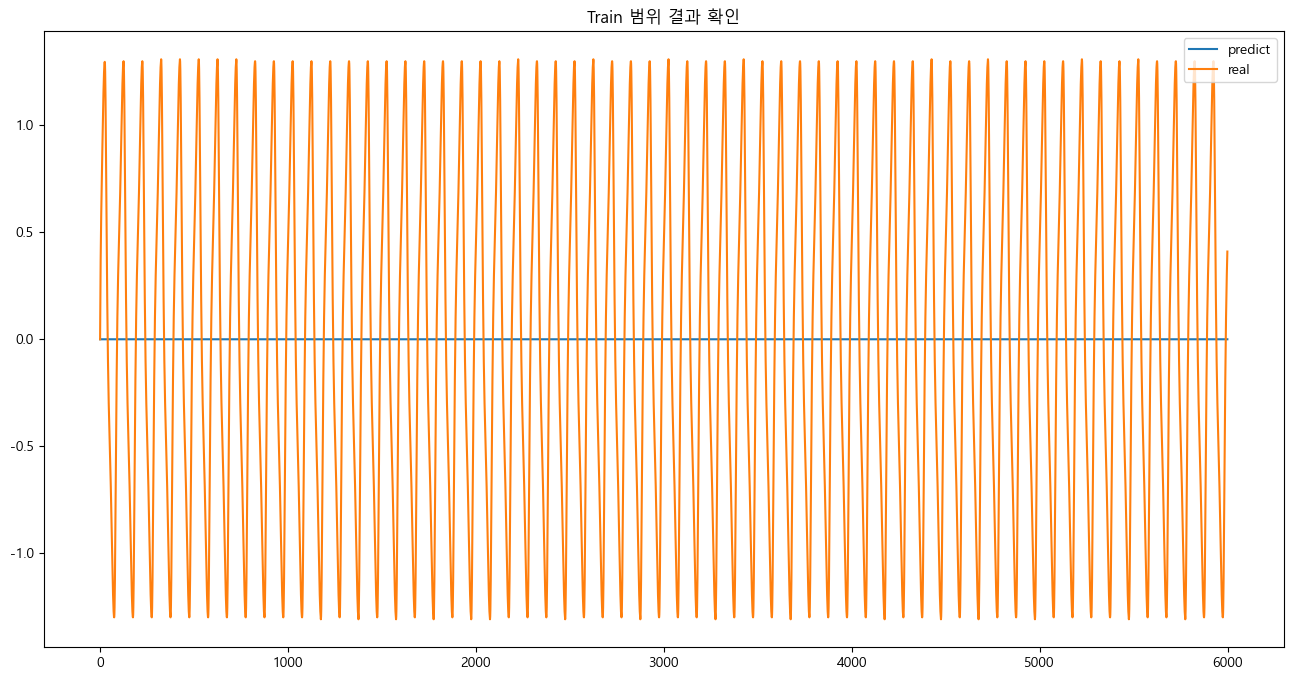

In [78]:
plt.figure(figsize=(16,8))
plt.plot(range(len(close_df_train)),result_matrix_3[:,2][:len(close_df_train)])
plt.plot(range(len(close_df_train)), close_df_train.f)
plt.title('Train 범위 결과 확인')
plt.legend(['predict', 'real'])
plt.show()